In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from pathlib import Path

rcParams = {
    'axes.titlesize': 30,
    'axes.labelsize': 28,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'legend.fontsize': 16,
    'lines.linewidth': 3,
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial']
}
sns.set_context("paper", font_scale=2, rc=rcParams)

results_folder = Path('../results/times')

In [2]:
# Get the colorblind palette
library_palette = sns.color_palette("tab10", n_colors=4)

method_colors = {
    'THOI': library_palette[2],
    'HOI_toolbox': library_palette[1],
    'HOI': library_palette[0],
    'JIDT': library_palette[3]
}

In [3]:
def estimated_computation_time(time_order_5, order):
    # assumes a system of 30 variables and 100000 samples
    nplet_time = time_order_5 / math.comb(30,5)
    return math.comb(30, order) * nplet_time


def get_quituplet_time_from_df(df, library, estimator):
    return df[(df.library == library) & (df.estimator == estimator) & (df['T'] == 1000) & (df.order == 5)]['time'].values[0]


def plot_estimated_computation_times(df, ax):
    
    quintuplet_times = {
        'HOI_toolbox': get_quituplet_time_from_df(df, 'HOI_toolbox', 'GC'),
        'HOI': get_quituplet_time_from_df(df, 'HOI', 'GC'),
        'JIDT': get_quituplet_time_from_df(df, 'JIDT', 'KSG')
    }

    dfs = []
    for library, tuple_t in quintuplet_times.items():
        df = pd.DataFrame({
            'time': [estimated_computation_time(tuple_t,k) for k in range(3,31)],
            'order': list(range(3,31))
        })
        df['library'] = library
        df['T'] = 1000
        df['N'] = 30
        dfs.append(df)

    # Combine all dataframes into one
    df = pd.concat(dfs, ignore_index=True)
    df['time'] = df['time']

    # Create a line plot using Seaborn
    ax = sns.lineplot(
        data=df, x="order", y="time",
        hue="library", style='library',
        markers=True, dashes=False, ax=ax,
        palette=method_colors
    )

    ax.set_xlabel('Order or interactions')
    ax.set_ylabel('Time (Hs)')
    ax.legend(title='Library')
    ax.grid(True)

    for library in quintuplet_times.keys():
        print(library)
        df_lib = df[(df.library == library)]
        print('time order 15:', math.floor(df_lib[df_lib.order == 15]['time'].values[0]), 'days')
        print('time all orders:', math.floor(df_lib['time'].sum()))

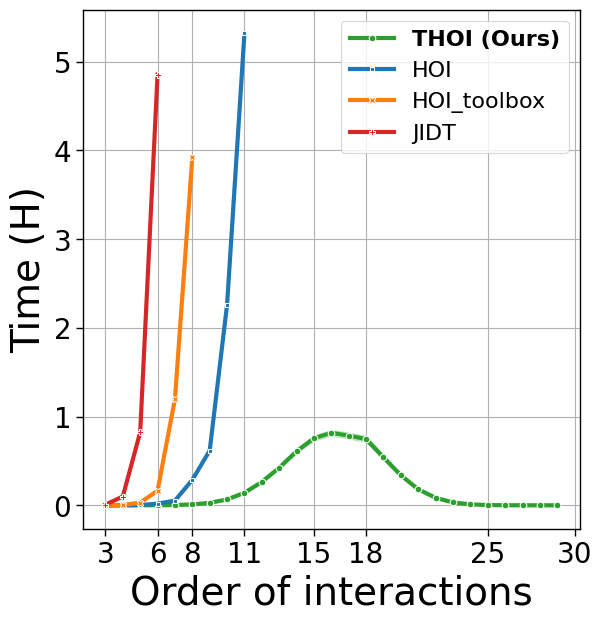

In [4]:
# Define the file paths
file_names = [
    "time_by_order_library-thoi.tsv",
    "time_by_order_library-hoitoolbox.tsv",
    "time_by_order_library-hoi.tsv",
    "time_by_order_library-jdit.tsv"
]

# Read each file into a DataFrame and assign a 'Method' column
combined_df = pd.concat([
    pd.read_csv(results_folder / file, sep="\t")
    for file in file_names
])
combined_df['time'] = combined_df['time'] / 60 / 60

#########################################
fig, ax = plt.subplots(figsize=(6.4, 6.6))

sns.lineplot(
    data=combined_df, x="order", y="time",
    hue="library", style='library',
    markers=True, dashes=False, ax=ax,
    palette=method_colors,
    hue_order=['THOI', 'HOI', 'HOI_toolbox', 'JIDT']
)
ax.set_xticks([3,6,8,11,15,18,25,30])

ax.set_xlabel('Order of interactions')
ax.set_ylabel('Time (H)')
ax.legend(title='Library')
ax.grid(True)

legend = plt.legend()
for text in legend.get_texts():
    if "THOI" == text.get_text():
        text.set_text("THOI (Ours)")
        text.set_weight("bold")

plt.tight_layout()
plt.show()

THOI


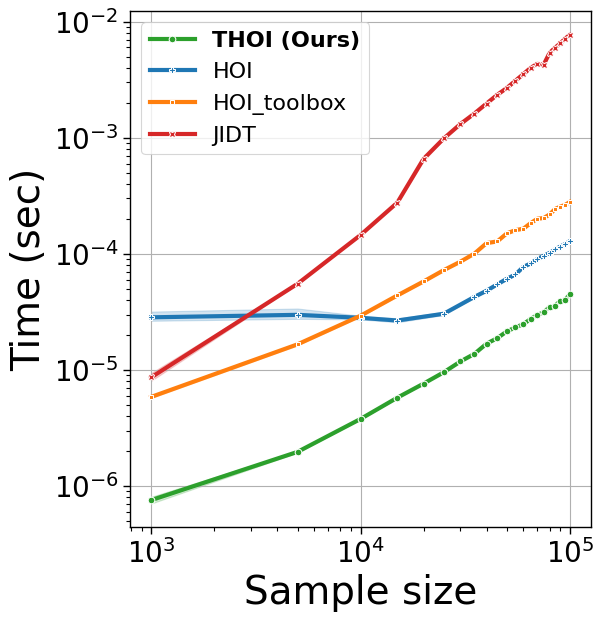

In [5]:
file_names = [
    "time_by_sample_size_library-thoi.tsv",
    "time_by_sample_size_library-jidt.tsv",
    "time_by_sample_size_library-hoitoolbox.tsv",
    "time_by_sample_size_library-hoi.tsv"
]

libraries = [
    'THOI',
    'JIDT',
    'HOI_toolbox',
    'HOI'
]

# Read each file into a DataFrame and assign a 'Method' column
dataframes = []
for file, library in zip(file_names, list(libraries)):
    df = pd.read_csv(results_folder / file, sep='\t')
    df['library'] = library
    dataframes.append(df)

# Combine all dataframes into one
combined_df = pd.concat(dataframes, ignore_index=True)
combined_df['time'] = combined_df['time'] / 60 / 60

# plot
fig, ax = plt.subplots(figsize=(6.4, 6.6))

sns.lineplot(
    data=combined_df, x="sample size", y="time",
    hue="library", style='library',
    markers=True, dashes=False, ax=ax,
    palette=method_colors,
    hue_order=['THOI', 'HOI', 'HOI_toolbox', 'JIDT']
)

# set x scale to log
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Sample size')
ax.set_ylabel('Time (sec)')
ax.legend(title='Library')
ax.grid(True)

legend = plt.legend()
for text in legend.get_texts():
    if "THOI" == text.get_text():
        text.set_text("THOI (Ours)")
        text.set_weight("bold")
        
# make THOI line thicker
for line in ax.lines:
    if 'THOI' in line.get_label():
        print(line.get_label())
        line.set_linewidth(28)

plt.tight_layout()
plt.show()